# Analyzing The Background and In Cell Fluorescence Intensities for the datasets from omnipose output

# Macro Analysis Comparing Cell and Background Intensities with Per Frame data Across Experiments (segmented by omnipose or pretrained ML)


This Script is intended to be used quickly following imaging to assess overall data collection methods. The data must first be segmented using the omnipose script with naming and folder structurs and then 



In [34]:
import pandas as pd

# Load the datasets
df_biorep1 = pd.read_csv(r"F:\Matthew Theodore_Microscopy\RNA Phages\FISH\568\568_Analyzed\df.csv")
#df_biorep2 = pd.read_csv(r"C:\Users\mattt\Documents\Omni\image_post_omni_biorep2_curated\df_biorep2.csv")



# Combine both datasets
#combined_df = pd.concat([df_biorep1, df_biorep2], ignore_index=True)
combined_df = df_biorep1

# Displaying basic information about the dataset
basic_info = combined_df.info()

# Displaying the first few rows to understand the structure of the data
first_few_rows = combined_df.head()

# Displaying unique values for key columns to understand their distribution
unique_values = {
    column: combined_df[column].unique() for column in combined_df.columns
}

basic_info, first_few_rows, unique_values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10852 entries, 0 to 10851
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean           10852 non-null  float64
 1   median         10852 non-null  float64
 2   max            10852 non-null  int64  
 3   min            10852 non-null  int64  
 4   std_dev        10852 non-null  float64
 5   skewness       10852 non-null  float64
 6   kurtosis       10852 non-null  float64
 7   pixel_count    10852 non-null  int64  
 8   area_covered   10852 non-null  float64
 9   frame          10852 non-null  int64  
 10  z_stack        10852 non-null  int64  
 11  channel        10852 non-null  int64  
 12  full_filepath  10852 non-null  object 
 13  condition      10852 non-null  object 
 14  time           10852 non-null  object 
 15  strain         10852 non-null  object 
 16  image_type     10852 non-null  object 
 17  biorep         10852 non-null  int64  
 18  signal

(None,
           mean  median    max   min      std_dev  skewness   kurtosis  \
 0  1305.304283  1297.0   2389   760   151.812291  0.348067   0.314251   
 1   990.147037   980.0   3302   612   119.620517  0.835337   3.611546   
 2  2810.729729  2128.0  19258  1112  1738.559308  2.872500  10.300268   
 3  1288.609698  1281.0   2371   735   149.273773  0.333465   0.252249   
 4   981.069706   972.0   2761   596   118.055948  0.797687   3.208300   
 
    pixel_count  area_covered  frame  z_stack  channel  \
 0       231357      0.882557      0        0        0   
 1       231357      0.882557      0        0        1   
 2       231357      0.882557      0        0        2   
 3       231357      0.882557      0        1        0   
 4       231357      0.882557      0        1        1   
 
                                        full_filepath condition     time  \
 0  F:\Matthew Theodore_Microscopy\RNA Phages\FISH...       inf  LZ22225   
 1  F:\Matthew Theodore_Microscopy\RNA Phages

In [35]:

# Filter for the FISH signal only
fish_signal_df = combined_df[combined_df['signal'] == 'fish']

# Focusing on rows where image_type is 'background'
background_data = fish_signal_df[fish_signal_df['image_type'] == 'background']

# Selecting only numeric columns for aggregation
numeric_columns = ['mean', 'median', 'max', 'min', 'std_dev']

# Grouping the data by strain, time, and bioreplicate and aggregating only the numeric columns
grouped_background_data = background_data.groupby(['strain', 'time', 'biorep'])[numeric_columns].agg(['mean', 'median', 'std'])

# Display the grouped data for analysis
grouped_background_data.head()


mean                               median  \
                               mean       median        std         mean   
strain  time    biorep                                                     
568     LZ22225 1       1280.995834  1275.825573  26.206974  1269.500000   
LZ22225 0min    1        908.801968   908.511027   7.865337   902.243478   
                2       1313.470474  1312.555523  21.976473  1306.760000   
        10min   1       1330.932261  1290.323913  99.949295  1311.689655   
                2       1286.774455  1288.587980  41.922966  1277.427451   

                                                   max                        \
                        median        std         mean  median           std   
strain  time    biorep                                                         
568     LZ22225 1       1267.5  17.881983  9009.920000  2362.0  19094.151989   
LZ22225 0min    1        902.0   7.823257  2028.130435  1763.0    767.043796   
                2       1306.0  21.868348  2801.450000  2270.5   1230.335114   
        10min   1       1283.0  74.153324  5558.013793  3113.0  11333.115211   
                2       1280.0  39.828096  7847.066667  3278.0   9316.542796   

                               min                        std_dev              \
                              mean median         std        mean      median   
strain  time    biorep                                                          
568     LZ22225 1       724.360000  738.5  103.587045  211.017747  147.194091   
LZ22225 0min    1       575.426087  576.0   12.077281   99.239158   97.968715   
                2       765.070000  764.0   25.832895  147.554187  147.492040   
        10min   1       760.813793  755.0   40.448181  193.757092  150.462772   
                2       748.545098  751.0   33.055265  163.891021  146.657857   

                                    
                               std  
strain  time    biorep              
568     LZ22225 1       194.785527  
LZ22225 0min    1         4.932231  
                2         3.321635  
        10min   1       144.645185  
                2        44.805433

## Basing it on overall Experiment (Not Grouping based on condition)

C:\Users\Nikon\AppData\Local\Temp\ipykernel_19324\12944117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str)
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

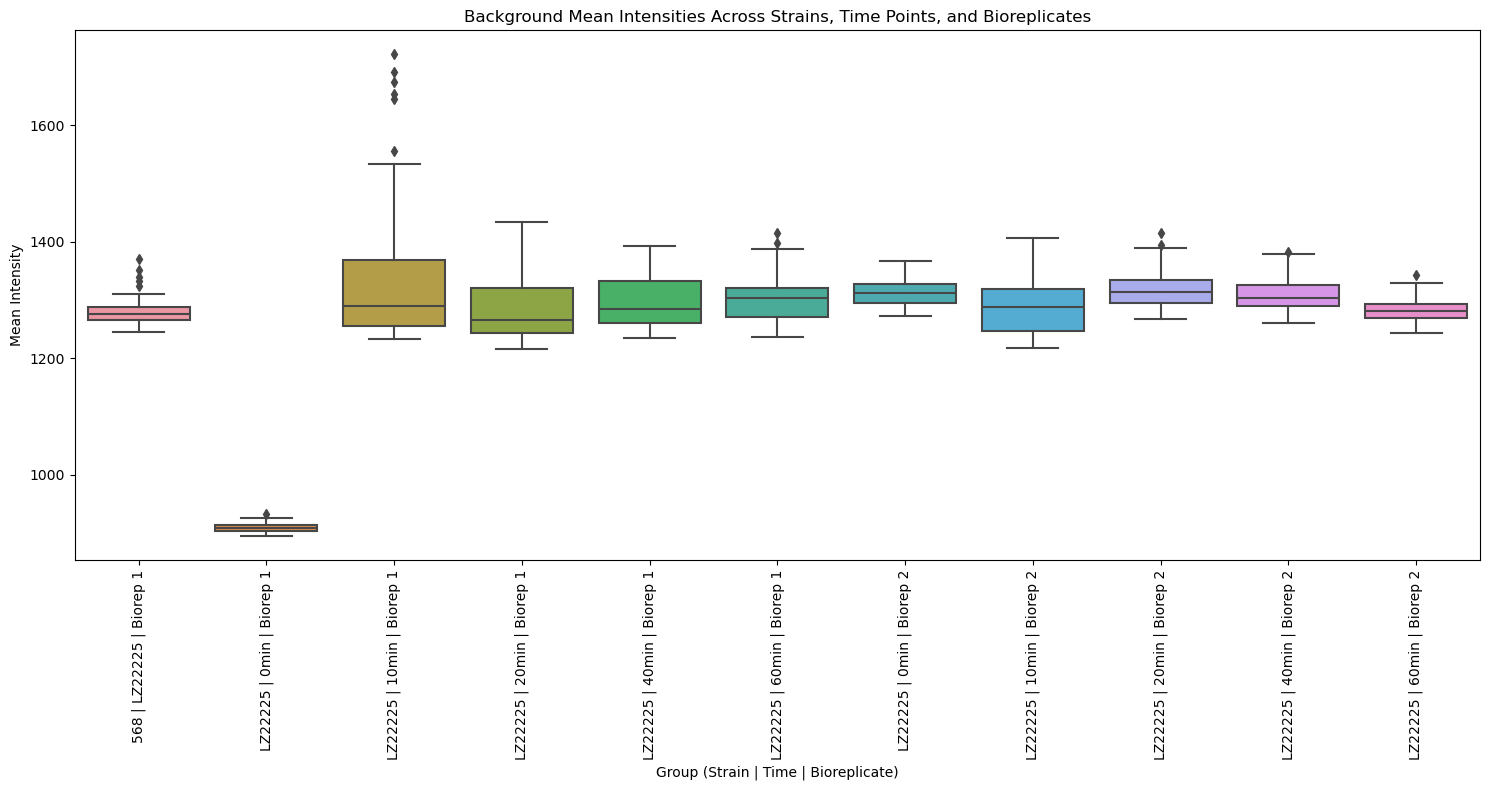

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data for visualization
# Create a new column that combines strain, time, and bioreplicate for easier plotting
background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str)

# Plotting background mean intensities for each group
plt.figure(figsize=(15, 8))
sns.boxplot(x='group', y='mean', data=background_data)
plt.xticks(rotation=90)
plt.title('Background Mean Intensities Across Strains, Time Points, and Bioreplicates')
plt.xlabel('Group (Strain | Time | Bioreplicate)')
plt.ylabel('Mean Intensity')
plt.tight_layout()  # To ensure the layout fits well in the output cell
plt.show()



C:\Users\Nikon\AppData\Local\Temp\ipykernel_19324\3488894401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str) + ' | ' + background_data['condition']
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

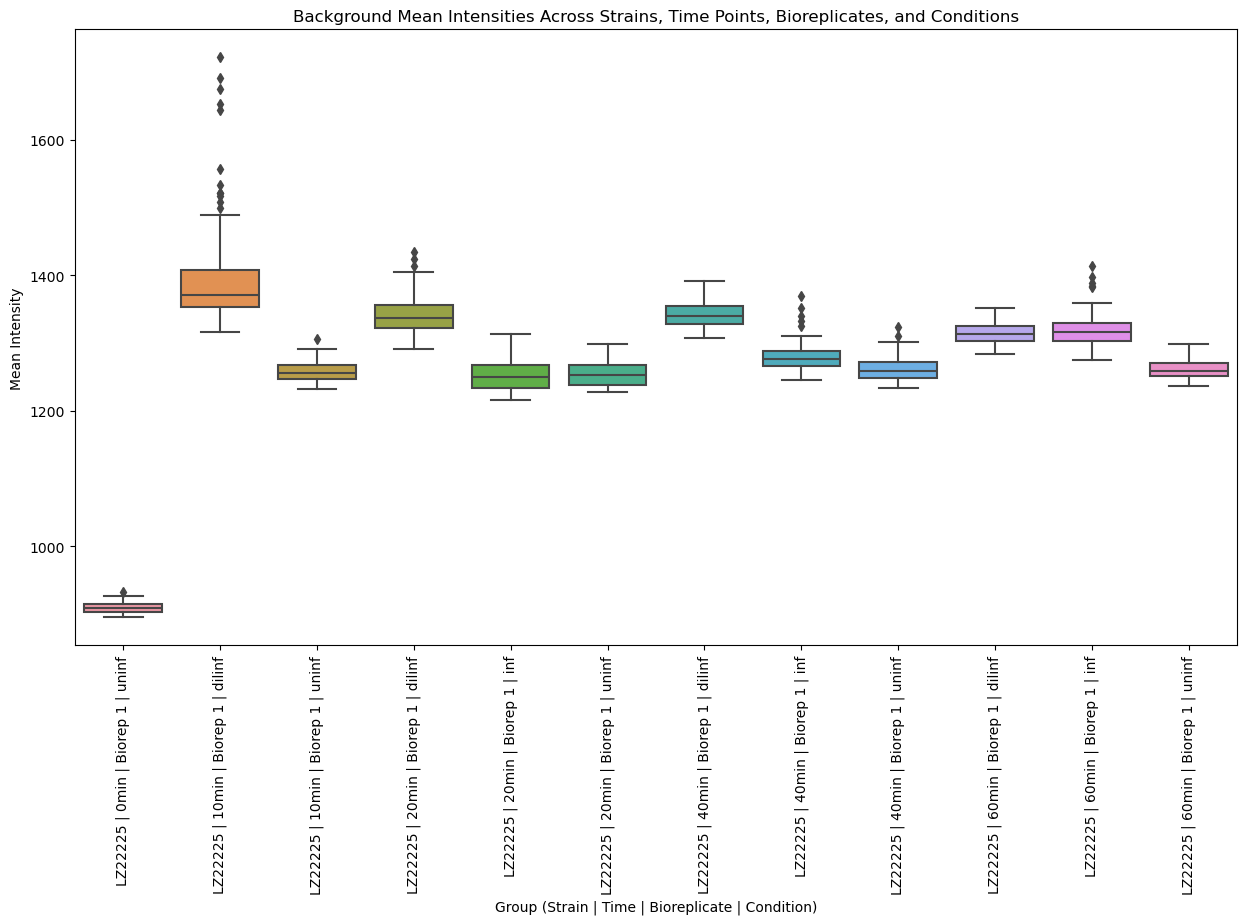

In [23]:


# Preparing the data for visualization
# Create a new column that combines strain, time, bioreplicate, and condition for easier plotting
background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str) + ' | ' + background_data['condition']

# Plotting background mean intensities for each group
plt.figure(figsize=(15, 8))
sns.boxplot(x='group', y='mean', data=background_data)
plt.xticks(rotation=90)
plt.title('Background Mean Intensities Across Strains, Time Points, Bioreplicates, and Conditions')
plt.xlabel('Group (Strain | Time | Bioreplicate | Condition)')
plt.ylabel('Mean Intensity')
plt.show()


#### Now plotting grouped by Zstack to see if theres a trend or explanation 

c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

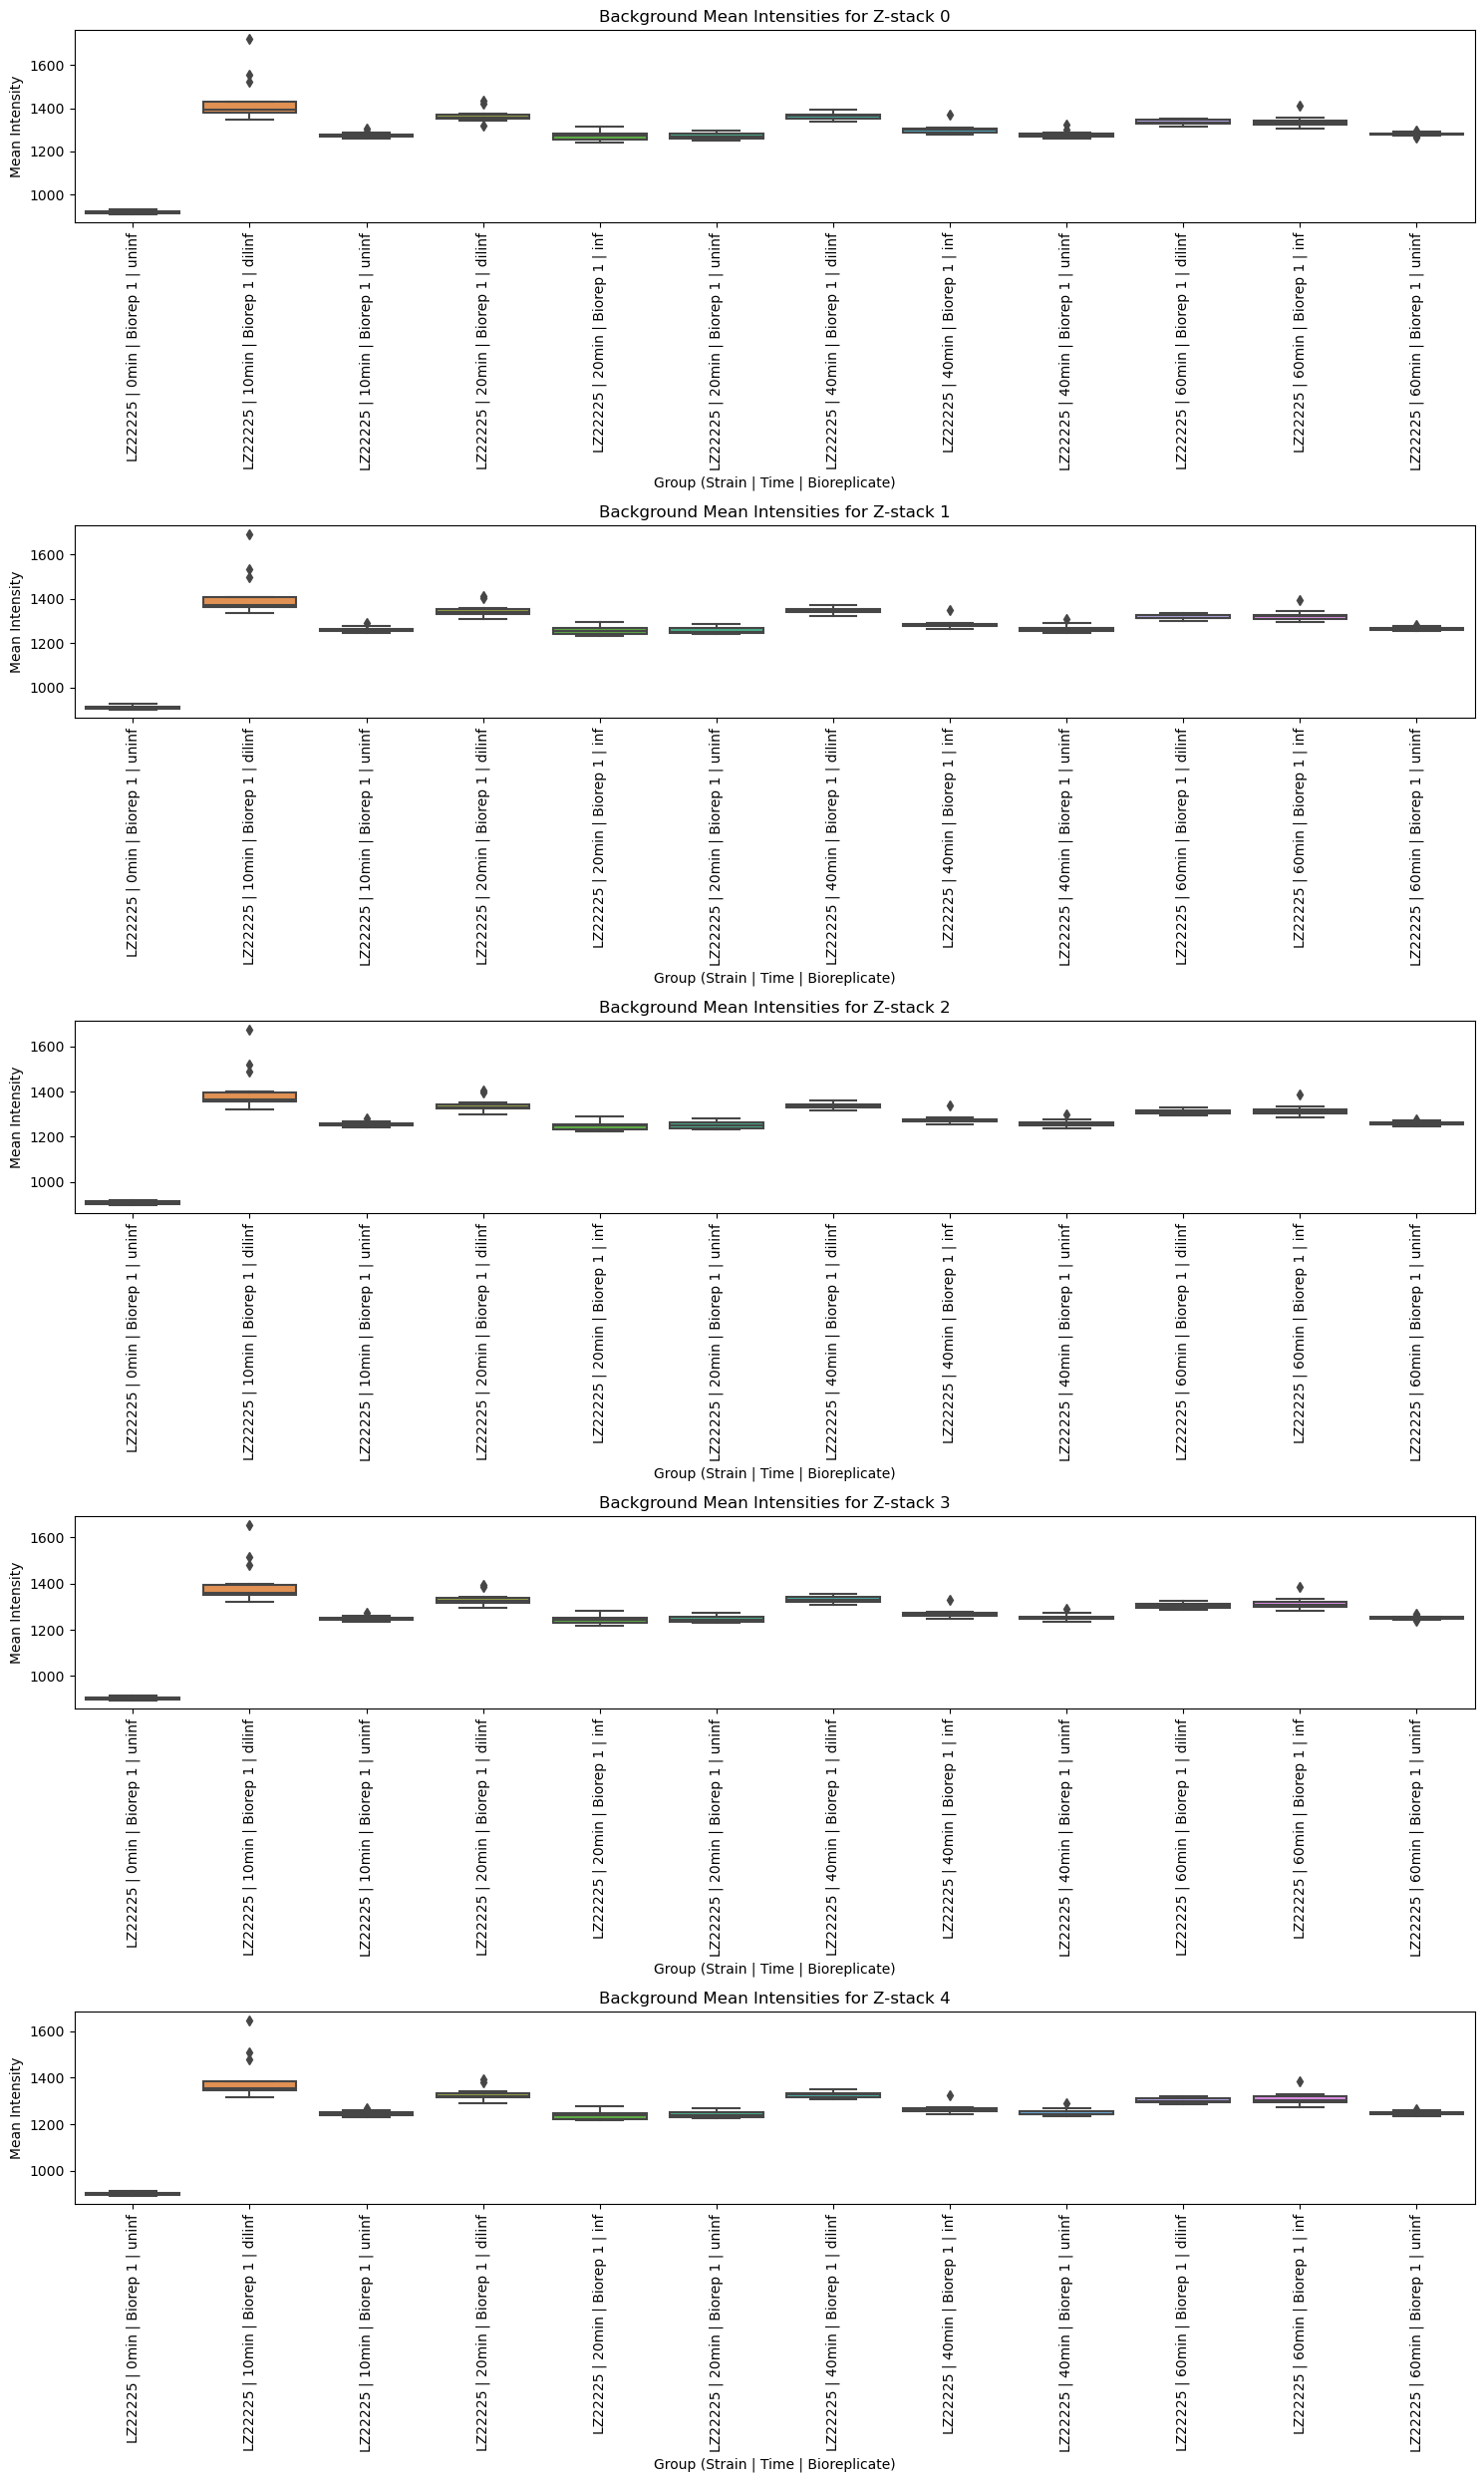

In [24]:
# Creating separate plots for each Z-stack
z_stacks = background_data['z_stack'].unique()

# Setting up the figure for multiple subplots
fig, axes = plt.subplots(len(z_stacks), 1, figsize=(15, 5 * len(z_stacks)))

# Looping through each Z-stack to create a plot
for i, z_stack in enumerate(z_stacks):
    # Filter data for the current Z-stack
    data_for_z_stack = background_data[background_data['z_stack'] == z_stack]

    # Plot
    sns.boxplot(x='group', y='mean', data=data_for_z_stack, ax=axes[i])
    axes[i].set_title(f'Background Mean Intensities for Z-stack {z_stack}')
    axes[i].set_xlabel('Group (Strain | Time | Bioreplicate)')
    axes[i].set_ylabel('Mean Intensity')
    axes[i].tick_params(axis='x', rotation=90)

# Adjusting layout
plt.tight_layout()
plt.show()


## Looking at differences in infected vs uninfected with the experiment 

C:\Users\Nikon\AppData\Local\Temp\ipykernel_19324\3135339275.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_z_stack['group_condition'] = data_for_z_stack['group'] + ' | ' + data_for_z_stack['condition']
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype

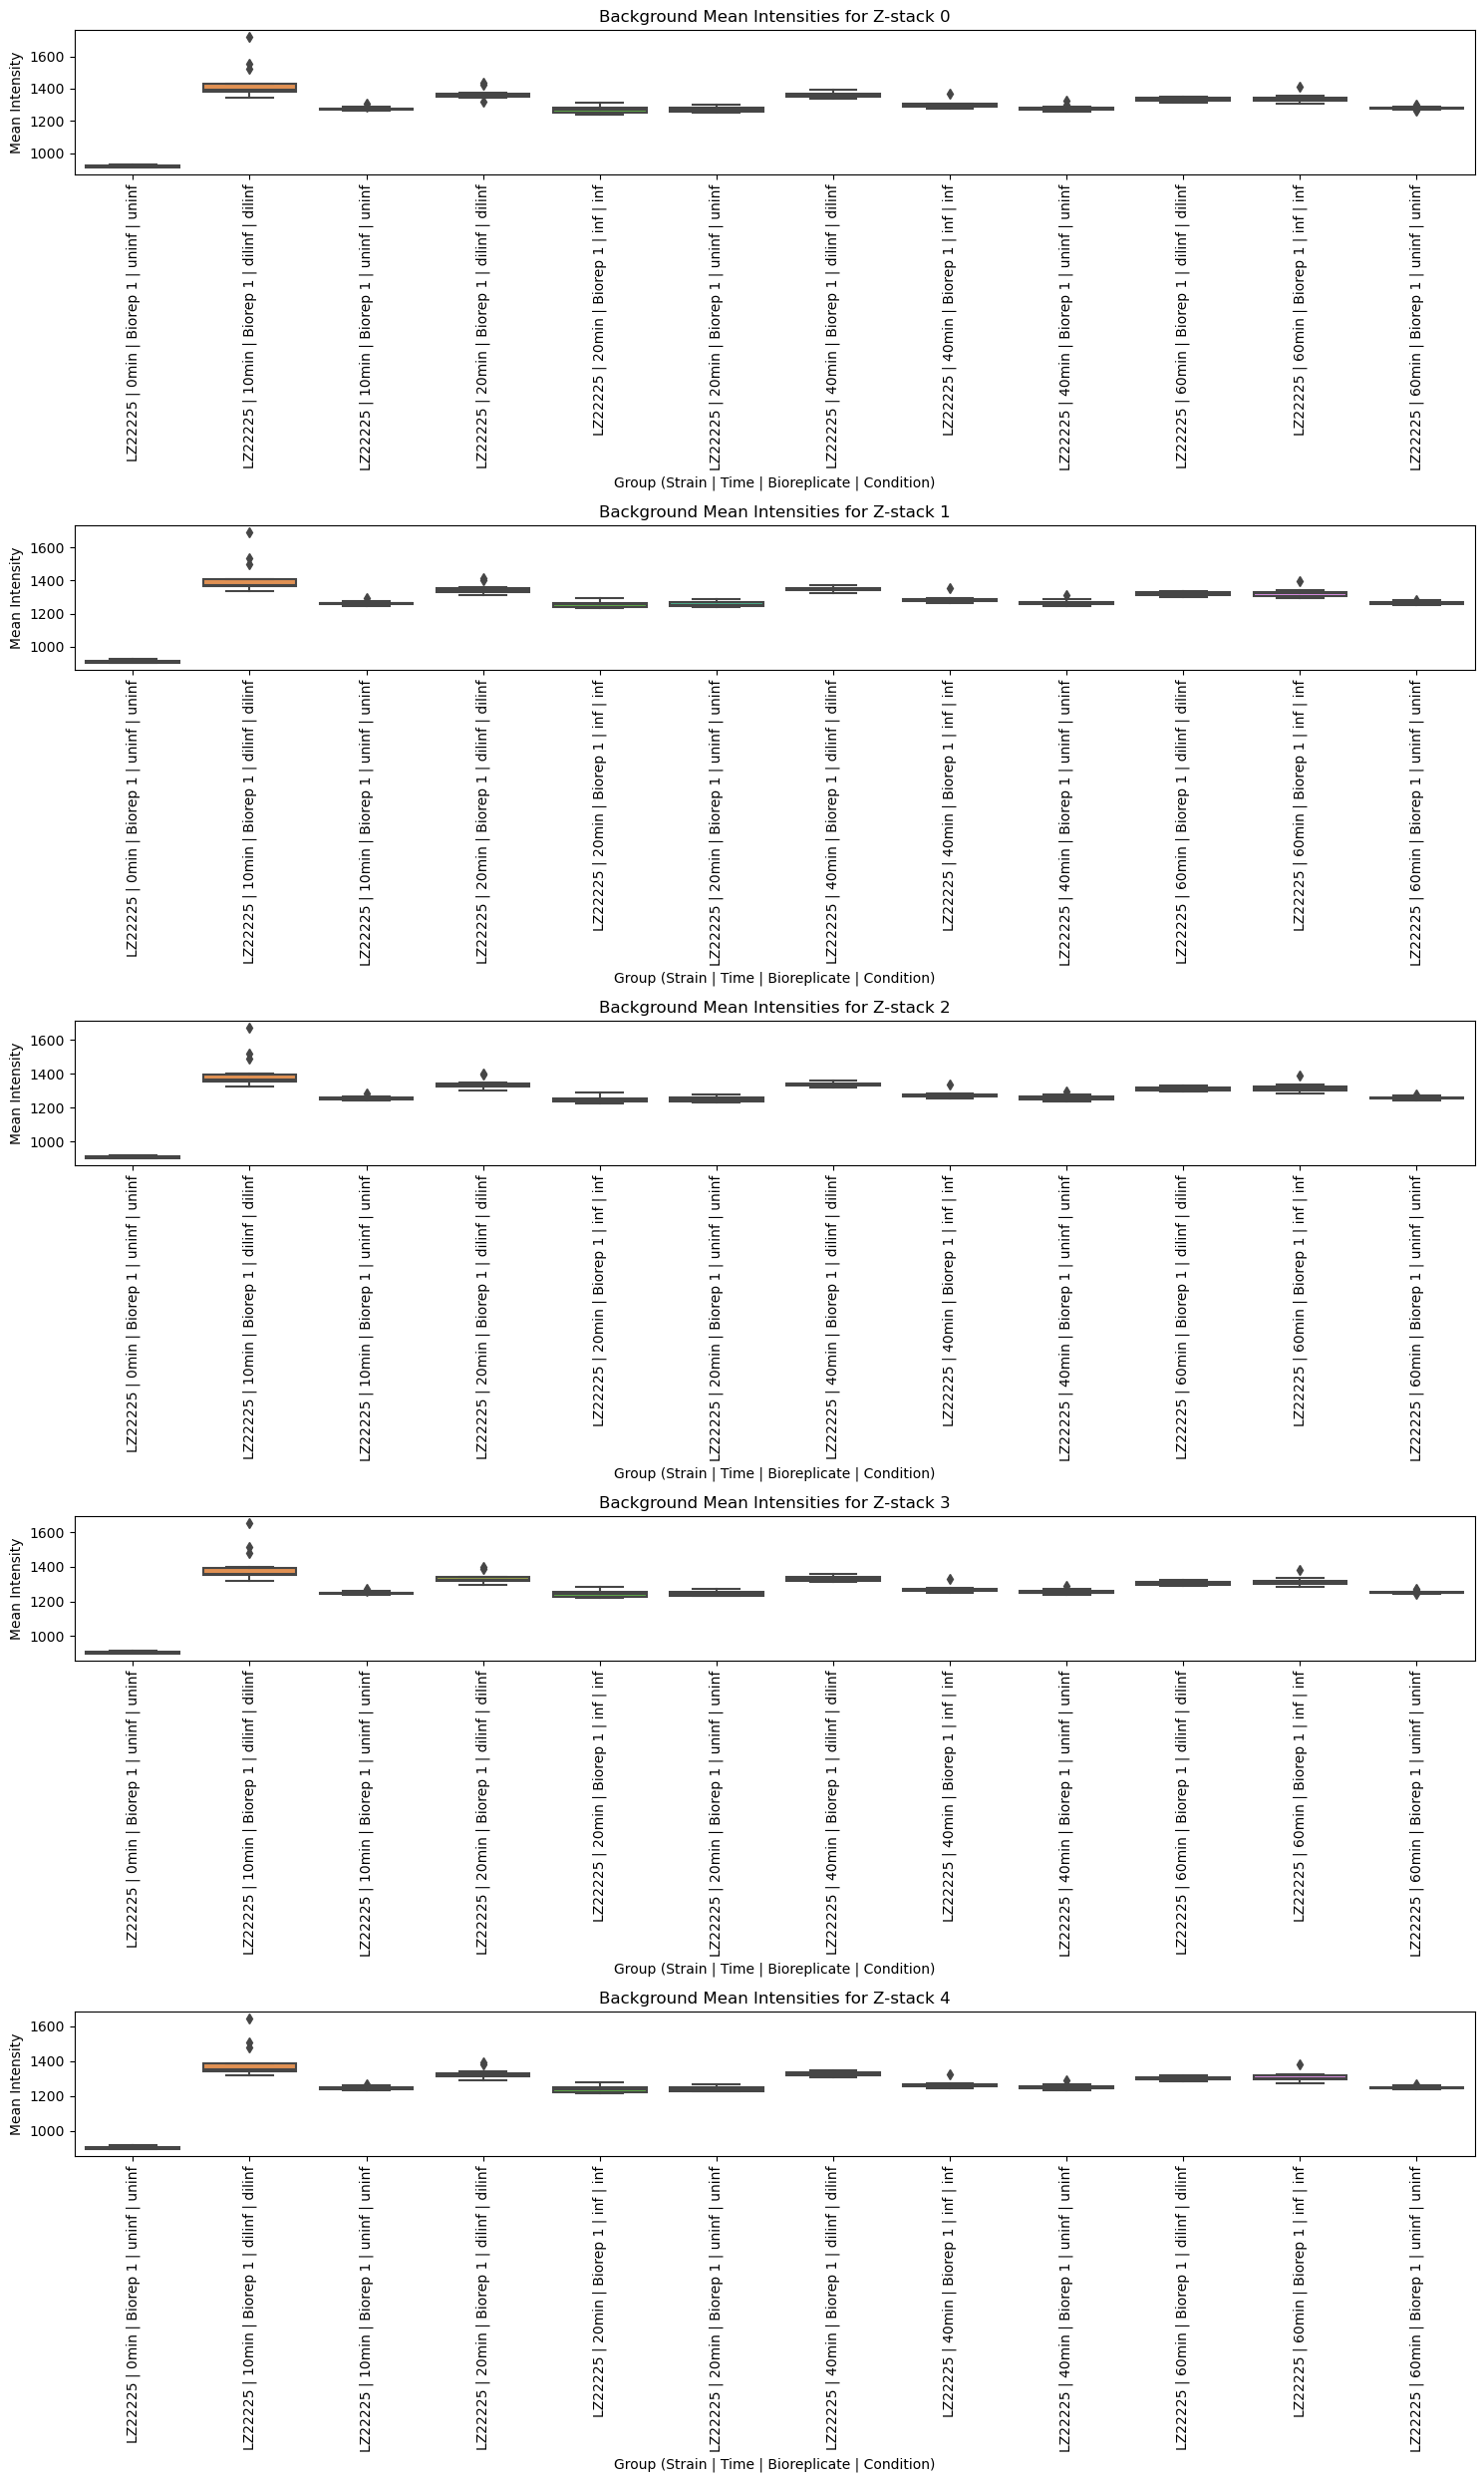

In [25]:
# Creating separate plots for each Z-stack, now also grouped by condition
fig, axes = plt.subplots(len(z_stacks), 1, figsize=(15, 5 * len(z_stacks)))

# Looping through each Z-stack to create a plot, now considering 'condition'
for i, z_stack in enumerate(z_stacks):
    # Filter data for the current Z-stack
    data_for_z_stack = background_data[background_data['z_stack'] == z_stack]

    # Grouping based on condition as well
    data_for_z_stack['group_condition'] = data_for_z_stack['group'] + ' | ' + data_for_z_stack['condition']

    # Plot
    sns.boxplot(x='group_condition', y='mean', data=data_for_z_stack, ax=axes[i])
    axes[i].set_title(f'Background Mean Intensities for Z-stack {z_stack}')
    axes[i].set_xlabel('Group (Strain | Time | Bioreplicate | Condition)')
    axes[i].set_ylabel('Mean Intensity')
    axes[i].tick_params(axis='x', rotation=90)

# Adjusting layout
plt.tight_layout()
plt.show()


c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

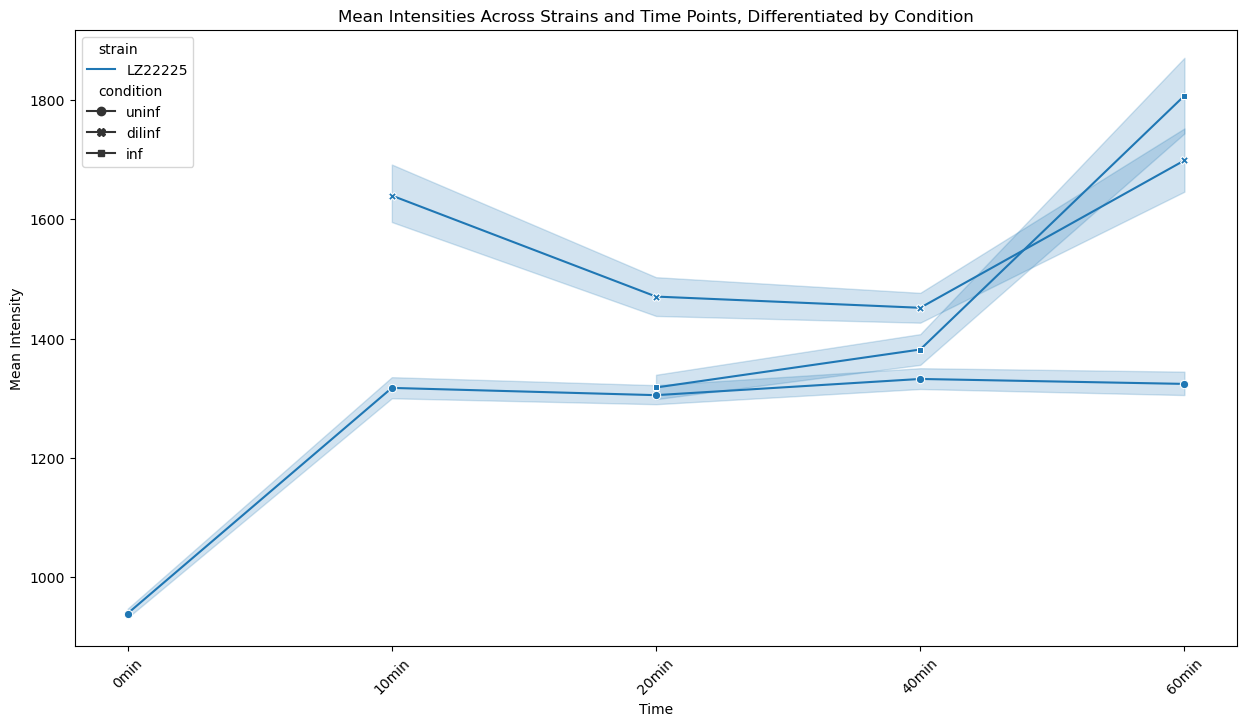

c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

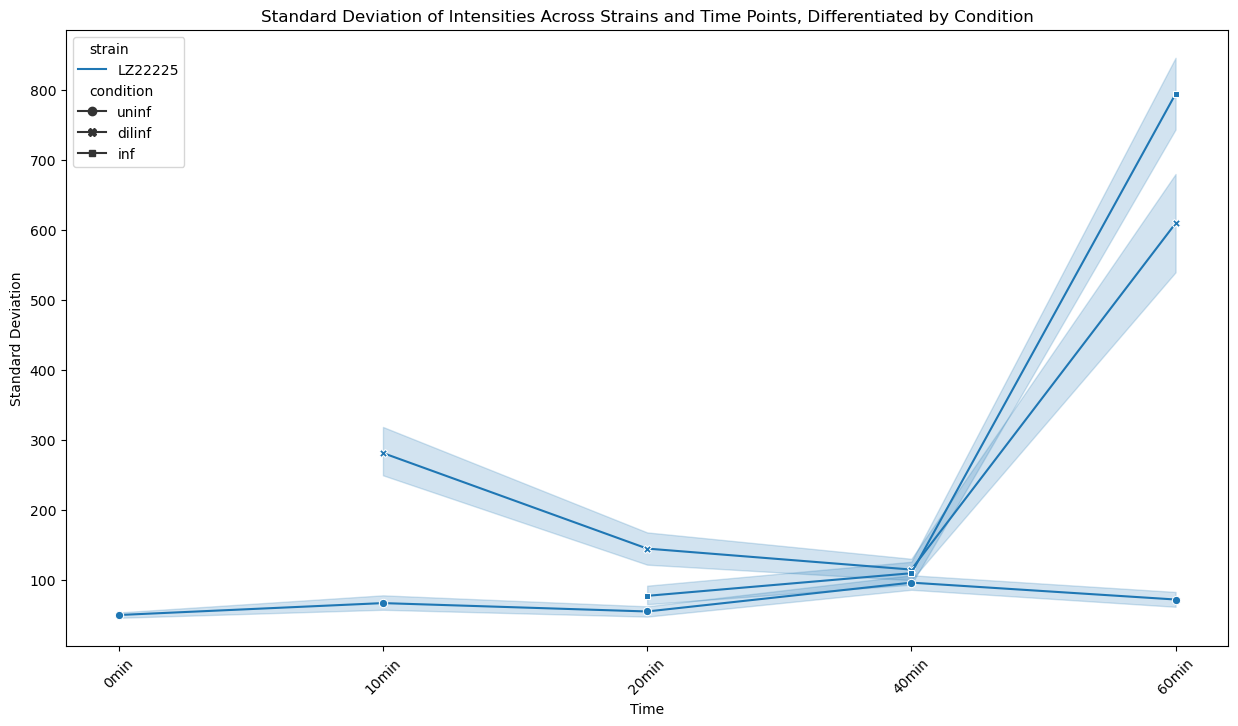

c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

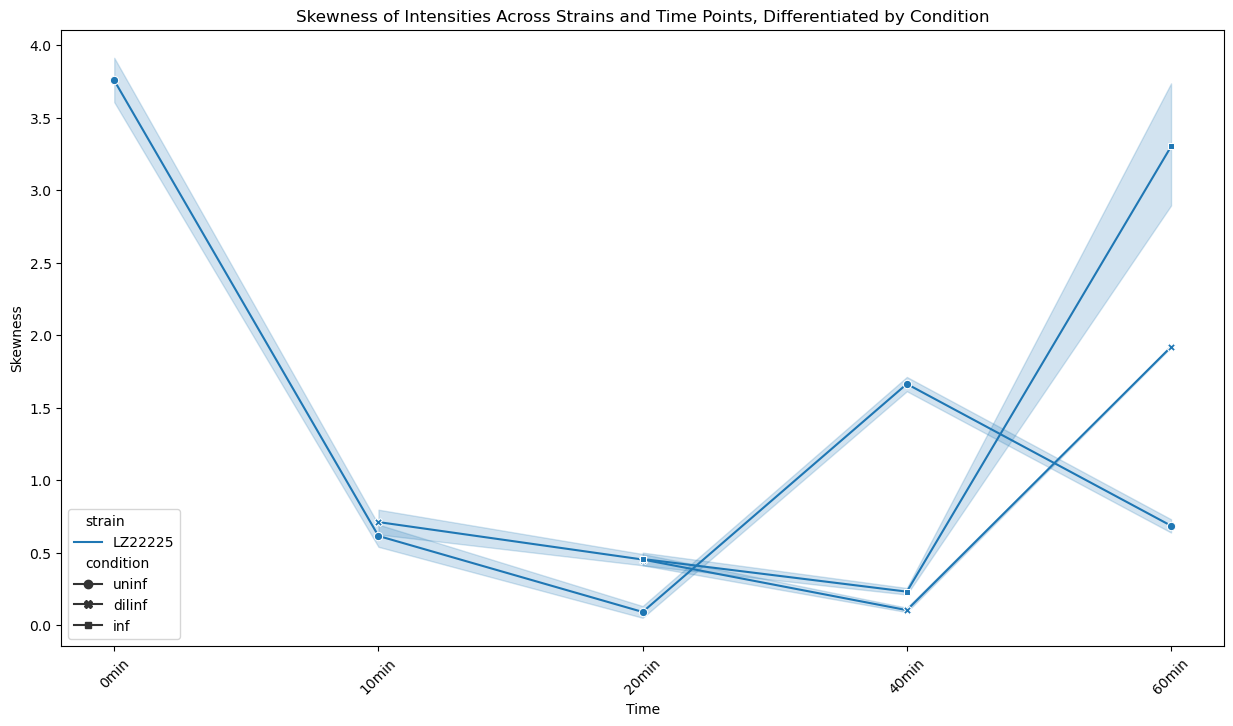

In [26]:
# Calculating descriptive statistics for key metrics across different groupings


# Grouping and aggregating only the numeric columns
grouped_stats_no_kurtosis = fish_signal_df.groupby(['strain', 'time', 'biorep', 'condition', 'z_stack'])[numeric_columns].agg(['mean', 'median', 'std', 'skew'])

# Focusing on the 'mean' intensity metric
grouped_mean_intensity_stats_no_kurtosis = grouped_stats_no_kurtosis['mean']

# Displaying the descriptive statistics for the mean intensity
grouped_mean_intensity_stats_no_kurtosis.head()

# Exploratory Data Analysis on the descriptive statistics
# We will visualize some of these statistics to look for trends

# Preparing a simpler DataFrame for visualization
eda_df = grouped_mean_intensity_stats_no_kurtosis.reset_index()

# Visualizing Mean Intensities Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='mean', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Mean Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Mean Intensity')
plt.xticks(rotation=45)
plt.show()

# Visualizing Standard Deviation Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='std', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Standard Deviation of Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.show()

# Visualizing Skewness Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='skew', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Skewness of Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Getting the count of unique combinations of the specified columns
unique_combinations_count = fish_signal_df.groupby(['condition', 'strain', 'biorep', 'time', 'image_type']).size().reset_index(name='count')

unique_combinations_count

,condition,strain,biorep,time,image_type,count
0,dilinf,LZ22225,1,10min,background,70
1,dilinf,LZ22225,1,10min,cell,70
2,dilinf,LZ22225,1,20min,background,60
3,dilinf,LZ22225,1,20min,cell,60
4,dilinf,LZ22225,1,40min,background,60
5,dilinf,LZ22225,1,40min,cell,60
6,dilinf,LZ22225,1,60min,background,65
7,dilinf,LZ22225,1,60min,cell,65
8,inf,LZ22225,1,20min,background,60
9,inf,LZ22225,1,20min,cell,60


In [28]:
#### Analyzing based on differences in mean intensity infected and uninfected


# Filtering for 'inf' and 'uninf' conditions separately
inf_conditions = fish_signal_df[fish_signal_df['condition'] == 'inf']
uninf_conditions = fish_signal_df[fish_signal_df['condition'] == 'uninf']


# Calculating the differences in mean intensities between 'inf' and 'uninf' conditions for the specified combinations

# Calculating mean intensities for each combination in the 'inf' and 'uninf' datasets
mean_inf = inf_conditions.groupby(['strain', 'biorep', 'time', 'image_type'])['mean'].mean().reset_index(name='mean_inf')
mean_uninf = uninf_conditions.groupby(['strain', 'biorep', 'time', 'image_type'])['mean'].mean().reset_index(name='mean_uninf')

# Merging the mean intensities for 'inf' and 'uninf' conditions
merged_means = pd.merge(mean_inf, mean_uninf, on=['strain', 'biorep', 'time', 'image_type'])

# Calculating the difference in mean intensities
merged_means['mean_intensity_diff'] = merged_means['mean_inf'] - merged_means['mean_uninf']

# Displaying the results
merged_means[['strain', 'biorep', 'time', 'image_type', 'mean_intensity_diff']]




,strain,biorep,time,image_type,mean_intensity_diff
0,LZ22225,1,20min,background,-2.984583
1,LZ22225,1,20min,cell,28.664336
2,LZ22225,1,40min,background,19.143095
3,LZ22225,1,40min,cell,79.527653
4,LZ22225,1,60min,background,57.912813
5,LZ22225,1,60min,cell,907.834835
